# Flights arrival

Data Lit Homework assignment by Denis Volchugin
16/02/2019

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv("../data/formatted_flights.csv")

In [3]:
df.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


In [4]:
df.set_index("Unnamed: 0", inplace=True)

In [5]:
df.drop(df.index[0], inplace=True)

In [6]:
df.arr_delay = df.arr_delay.astype("float64")

In [7]:
df.describe(include="all")

,arr_delay,name
count,317112.000000,317112
unique,NaN,16
top,NaN,United Air Lines Inc.
freq,NaN,56358
mean,1.297113,NaN
std,29.064442,NaN
min,-60.000000,NaN
25%,-17.000000,NaN
50%,-6.000000,NaN
75%,11.000000,NaN


## Number of flights by company

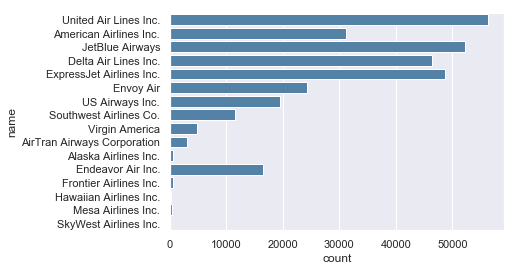

In [8]:
sns.countplot(y=df.name, orient="v", color="steelblue");

## Mean of arrival delay by company

In [9]:
mean = df.pivot_table(values="arr_delay", index="name", aggfunc=np.mean)

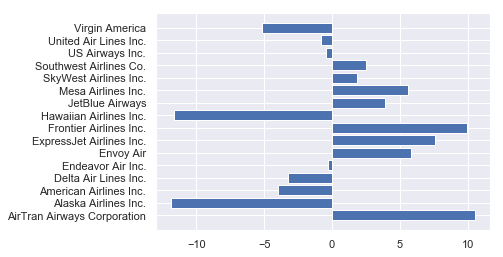

In [10]:
plt.barh(mean.index, mean.arr_delay);

## Standard deviation of arrival delay by company

In [11]:
std = df.pivot_table(values="arr_delay", index="name", aggfunc=np.std)

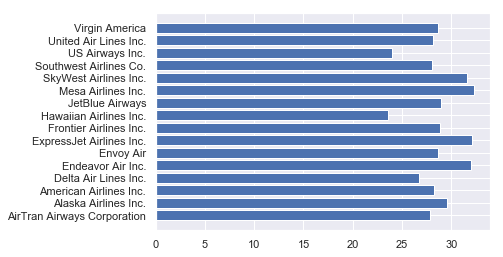

In [12]:
plt.barh(std.index, std.arr_delay);

## Distribution of observations by company

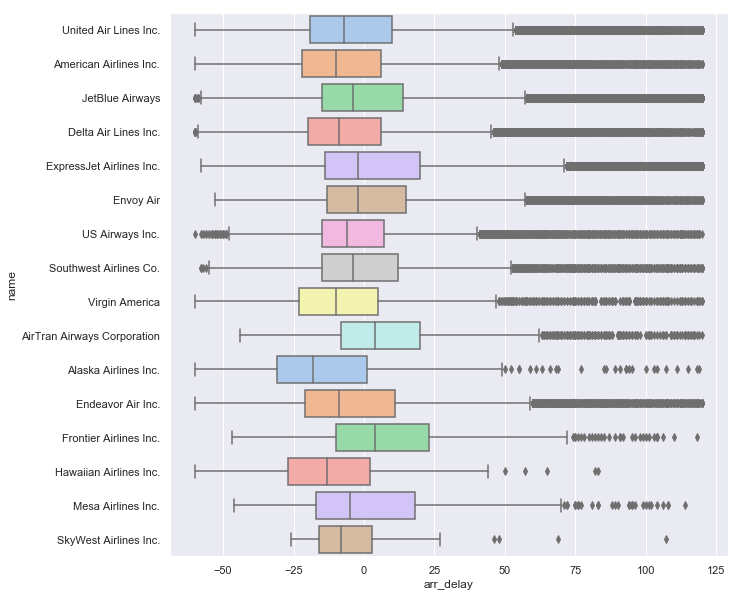

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x=df.arr_delay, y=df.name, palette="pastel", ax=ax);

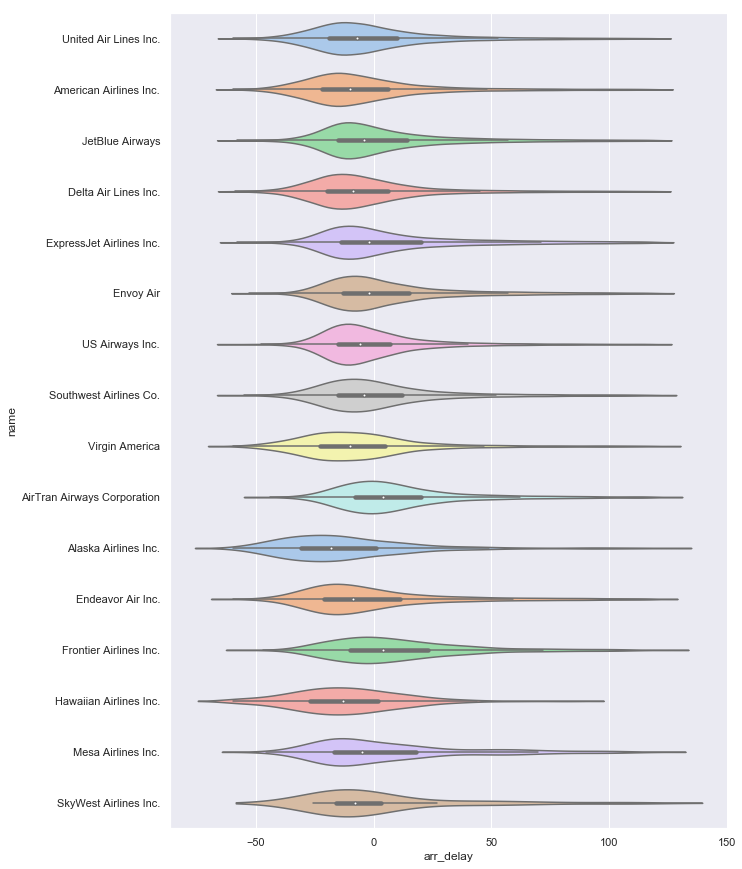

In [14]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.violinplot(x=df.arr_delay, y=df.name, palette="pastel", ax=ax);

## Density plots

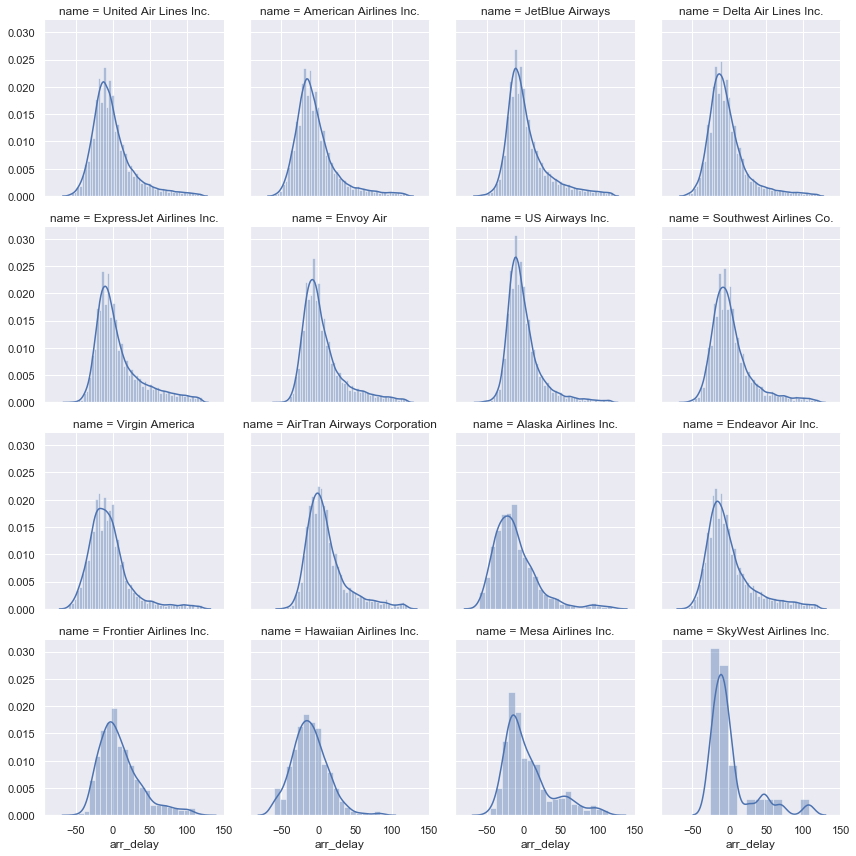

In [15]:
ordered_carrier = df.name.value_counts().index
g = sns.FacetGrid(
    df, col="name", col_wrap=4, height=3, aspect=1, row_order=ordered_carrier
)
g.map(sns.distplot, "arr_delay", hist=True, rug=False);

## Conclusion #1

At this point I would choose US Airways Inc. since the company demonstrates best results in "coming on-time". The arrival delay in 50% cases is within +/- 10 min. Density of scheduled arrival is the best vs competitors.

# Check different samples of data

### 5000 sample

In [16]:
frames = list()
for name in df["name"].unique():
    frame = df[df["name"] == name].sample(5000, replace=True)
    frames.append(frame)

df1 = pd.concat(frames)
df1.describe()

,arr_delay
count,80000.000000
mean,0.915863
std,29.619155
min,-60.000000
25%,-18.000000
50%,-6.000000
75%,12.000000
max,120.000000


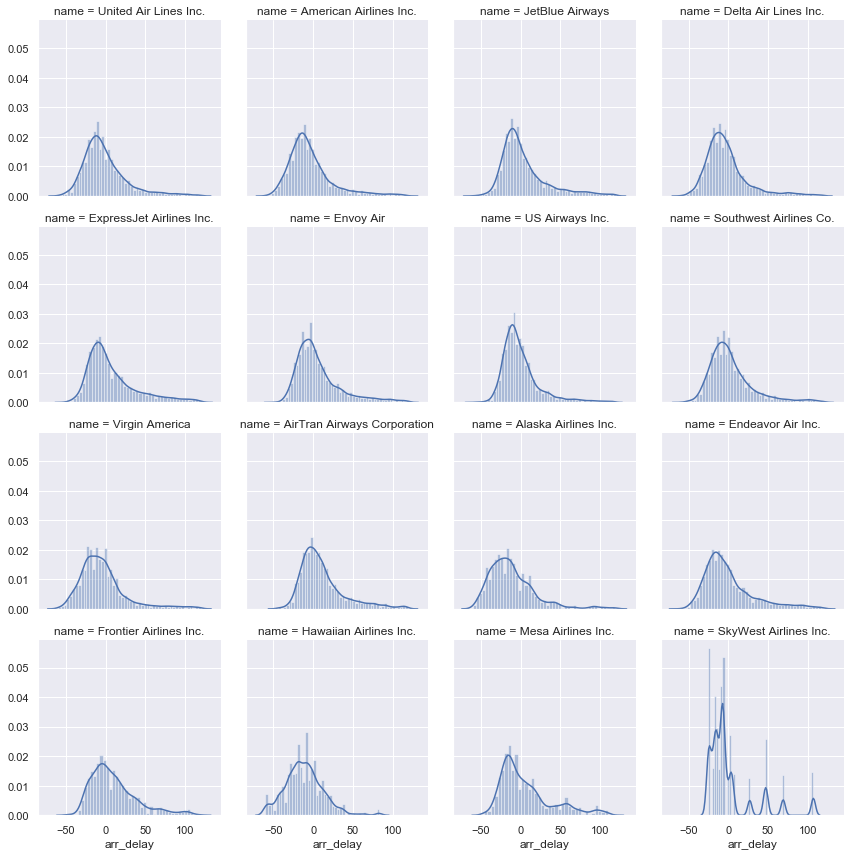

In [17]:
g = sns.FacetGrid(df1, col="name", col_wrap=4, height=3, aspect=1)
g.map(sns.distplot, "arr_delay", hist=True, rug=False);

In [18]:
df1.pivot_table(
    values="arr_delay", index="name", aggfunc={"count", "mean", np.std, "min", "max"}
)

,count,max,mean,min,std
name,,,,,
AirTran Airways Corporation,5000,119.0,11.0494,-44.0,28.088353
Alaska Airlines Inc.,5000,119.0,-11.5680,-60.0,29.078206
American Airlines Inc.,5000,120.0,-3.9404,-60.0,28.166773
Delta Air Lines Inc.,5000,120.0,-2.6280,-60.0,27.054412
Endeavor Air Inc.,5000,120.0,0.1528,-60.0,31.665590
Envoy Air,5000,120.0,6.2298,-49.0,28.769688
ExpressJet Airlines Inc.,5000,120.0,7.6856,-49.0,31.607413
Frontier Airlines Inc.,5000,118.0,10.0402,-47.0,29.189282
Hawaiian Airlines Inc.,5000,83.0,-11.4806,-60.0,23.747152


### 10 000 sample

In [19]:
frames = list()
for name in df["name"].unique():
    frame = df[df["name"] == name].sample(10000, replace=True)
    frames.append(frame)

df2 = pd.concat(frames)
df2.describe()

,arr_delay
count,160000.000000
mean,0.671994
std,29.468545
min,-60.000000
25%,-18.000000
50%,-6.000000
75%,11.000000
max,120.000000


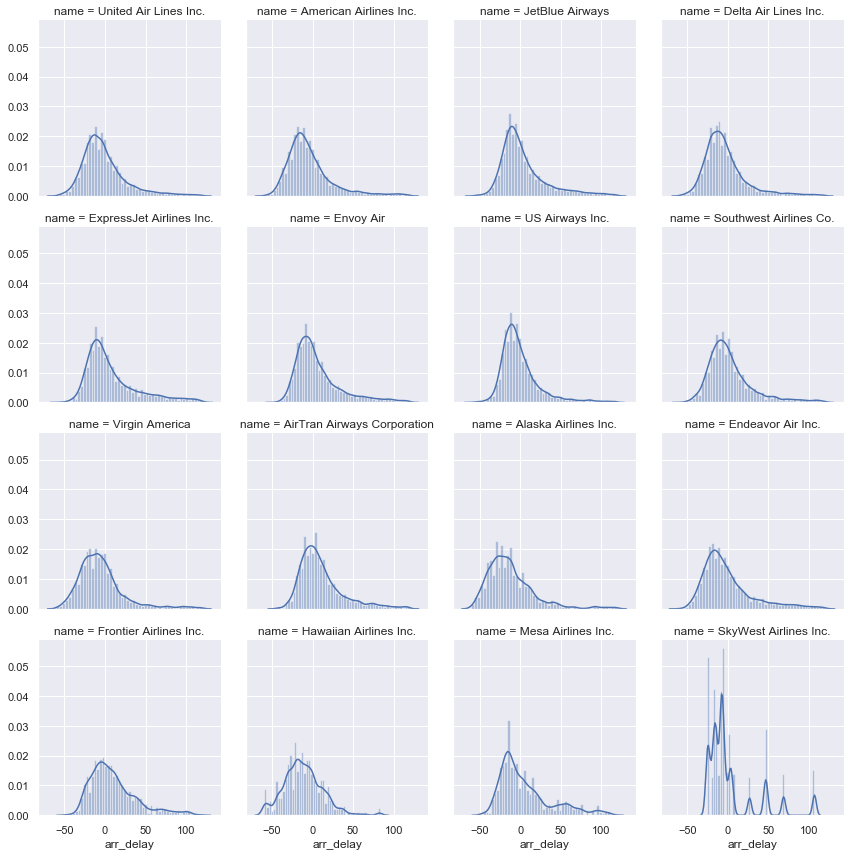

In [20]:
g = sns.FacetGrid(df2, col="name", col_wrap=4, height=3, aspect=1)
g.map(sns.distplot, "arr_delay", hist=True, rug=False);

### 50 000 sample

In [21]:
frames = list()
for name in df['name'].unique():
    frame = df[df['name'] == name].sample(50000, replace=True)
    frames.append(frame)

df3 = pd.concat(frames)
df3.describe()

,arr_delay
count,800000.000000
mean,0.597136
std,29.470488
min,-60.000000
25%,-18.000000
50%,-6.000000
75%,11.000000
max,120.000000


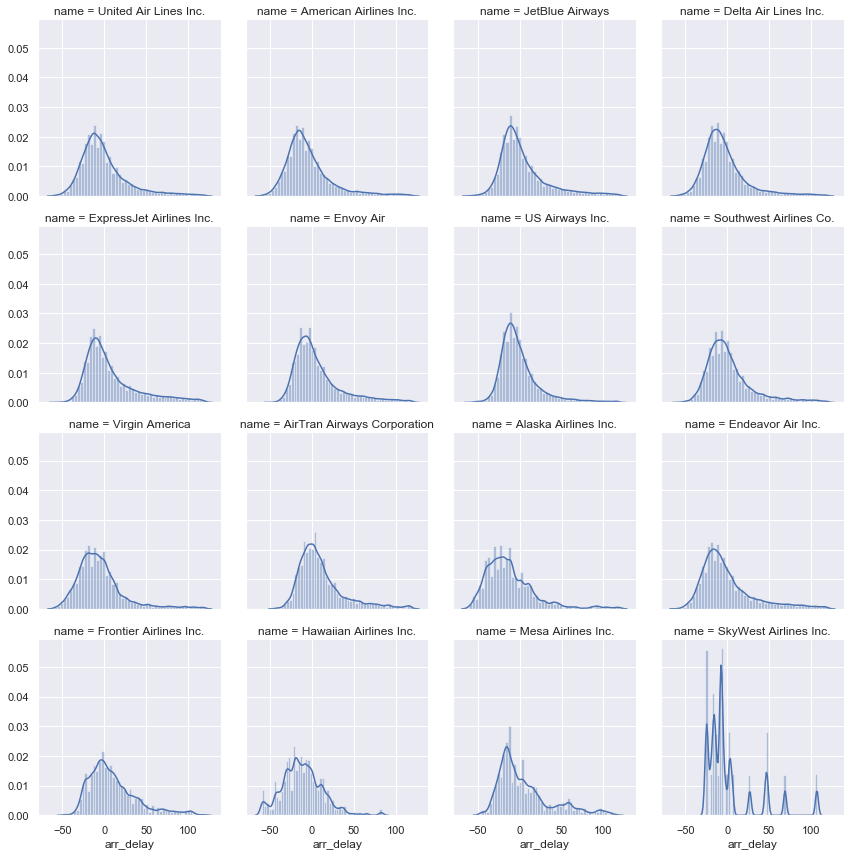

In [22]:
g = sns.FacetGrid(df3, col="name", col_wrap=4, height=3, aspect=1)
g.map(sns.distplot, "arr_delay", hist=True, rug=False);

### 100 000 sample

In [23]:
frames = list()
for name in df['name'].unique():
    frame = df[df['name'] == name].sample(100000, replace=True)
    frames.append(frame)

df4 = pd.concat(frames)
df4.describe()

,arr_delay
count,1.600000e+06
mean,6.352825e-01
std,2.946536e+01
min,-6.000000e+01
25%,-1.800000e+01
50%,-6.000000e+00
75%,1.100000e+01
max,1.200000e+02


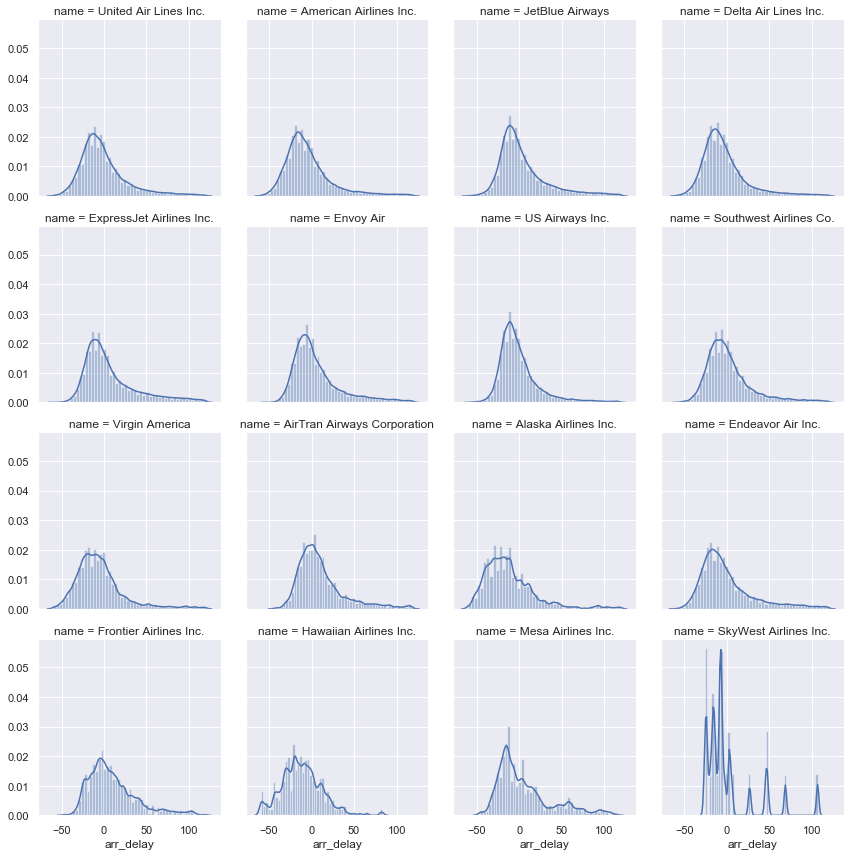

In [24]:
g = sns.FacetGrid(df4, col="name", col_wrap=4, height=3, aspect=1)
g.map(sns.distplot, "arr_delay", hist=True, rug=False);

In [25]:
df4.pivot_table(
    values="arr_delay", index="name", aggfunc={"count", "mean", np.std, "min", "max"}
)

,count,max,mean,min,std
name,,,,,
AirTran Airways Corporation,100000,120.0,10.57765,-44.0,27.833304
Alaska Airlines Inc.,100000,119.0,-11.79573,-60.0,29.620684
American Airlines Inc.,100000,120.0,-4.07366,-60.0,28.197365
Delta Air Lines Inc.,100000,120.0,-3.21199,-60.0,26.743321
Endeavor Air Inc.,100000,120.0,-0.33053,-60.0,31.834782
Envoy Air,100000,120.0,5.76809,-53.0,28.716110
ExpressJet Airlines Inc.,100000,120.0,7.43387,-58.0,32.022276
Frontier Airlines Inc.,100000,118.0,9.73503,-47.0,28.623247
Hawaiian Airlines Inc.,100000,83.0,-11.50156,-60.0,23.605022


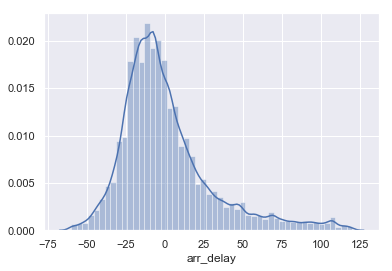

In [26]:
sns.distplot(df1.arr_delay, hist=True);

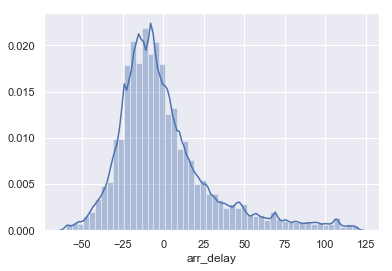

In [27]:
sns.distplot(df4.arr_delay, hist=True);

# Conclusion 2

In this case sampling distribution of a mean is not less spread then the values in total and it's getting closer with the samples of a bigger size.